# **Aula 09 - Redes Neurais: MultiLayer Perceptron (MLP)**
Sílvia Moraes
---
Neste exemplo usamos o **dataset da planta velha**, disponível em https://archive.ics.uci.edu/dataset/53/velha


In [1]:
#importando os pacotes usados
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Fazendo a carga do dataset e gerando os conjuntos X (atributos de entrada) e Y (tipo de planta velha).

In [2]:
#Exemplo com a planta velha
velha = pd.read_csv("amostras_.csv",sep=';')
print(velha.shape)
X = velha.iloc[:, [0, 1, 2, 3,4,5,6,7,8]].values
y = velha.iloc[:, [9]].values


(679, 10)


Printando os dados de entrada e os rótulos de cada coluna.

In [3]:
print("DADOS DE ENTRADA")
print(velha.columns[0],velha.columns[1], velha.columns[2], velha.columns[3],velha.columns[4],velha.columns[5],velha.columns[6],velha.columns[7],velha.columns[8])
print(X)

DADOS DE ENTRADA
pos1 pos2 pos3 pos4 pos5 pos6 pos7 pos8 pos9
[[ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1 -1  0 ...  0  0  0]
 ...
 [-1  1  1 ... -1  1  1]
 [-1  1  1 ... -1 -1  1]
 [-1 -1  1 ... -1  1  1]]


In [4]:
print("DADOS DE SAÍDA")
print("Classe do jogo da velha")
print(y)

DADOS DE SAÍDA
Classe do jogo da velha
[['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo

Divisão dos conjuntos de treino e teste usando o método train_test_split. O conjunto de treino ficou com 80% dos dados e o restante, 20%, ficou para o conjunto de teste.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=42)

In [6]:
X_tr, X_v, y_tr, y_v = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)


In [7]:
print("----------Conjunto de Treino-----------")
for i in range(0,len(X_tr)):
  print(i,"-", X_tr[i],"-",y_tr[i])

----------Conjunto de Treino-----------
0 - [-1  1 -1 -1  1  0  1  0  0] - ['Possibilidade_de_fim_de_jogo']
1 - [ 0  1 -1  0  1 -1  0  1  0] - ['Fim_de_jogo']
2 - [ 1 -1  1 -1  0  1 -1  0  1] - ['Fim_de_jogo']
3 - [ 1 -1  1 -1  0  0  1 -1  1] - ['Possibilidade_de_fim_de_jogo']
4 - [-1  1  1 -1  1  0 -1  0  0] - ['Fim_de_jogo']
5 - [ 0  1 -1  0  0  1 -1  1 -1] - ['Possibilidade_de_fim_de_jogo']
6 - [ 1 -1  1  0  0 -1  1  0 -1] - ['Possibilidade_de_fim_de_jogo']
7 - [-1  1  1 -1  1  0 -1 -1  1] - ['Fim_de_jogo']
8 - [ 1 -1  1 -1 -1  0  0  1  1] - ['Possibilidade_de_fim_de_jogo']
9 - [ 0  1  0 -1 -1 -1  0  1  1] - ['Fim_de_jogo']
10 - [ 1 -1  1  1  1 -1  0 -1 -1] - ['Possibilidade_de_fim_de_jogo']
11 - [-1  1 -1  1 -1  0  1  1  0] - ['Possibilidade_de_fim_de_jogo']
12 - [ 1 -1  0  1 -1  1  0  0  0] - ['Possibilidade_de_fim_de_jogo']
13 - [ 1 -1  0  1 -1  1 -1  1 -1] - ['Possibilidade_de_fim_de_jogo']
14 - [ 0  1 -1 -1  1  0  1 -1  1] - ['Em_jogo']
15 - [ 1 -1  1  0  1 -1  0 -1  0] - ['Pos

In [8]:
print("\n----------Conjunto de Validacao-----------")
for i in range(0,len(X_v)):
  print(i,"-",X_v[i],"-",y_v[i])


----------Conjunto de Validacao-----------
0 - [ 0  1 -1  1  0  0  0 -1  0] - ['Em_jogo']
1 - [-1  1 -1  1  0  1 -1  1 -1] - ['Possibilidade_de_fim_de_jogo']
2 - [-1  1 -1  1  0 -1  1  0  1] - ['Em_jogo']
3 - [ 0  1 -1  1  0  0  1 -1  0] - ['Em_jogo']
4 - [ 1 -1  1 -1 -1 -1  0  1  1] - ['Fim_de_jogo']
5 - [ 1 -1  1  1  1 -1  0  0 -1] - ['Em_jogo']
6 - [-1  1 -1  1  1  0  0  0  0] - ['Em_jogo']
7 - [ 1 -1  1  1  0 -1  0  0 -1] - ['Possibilidade_de_fim_de_jogo']
8 - [-1  1 -1  0  0  1  0  1 -1] - ['Possibilidade_de_fim_de_jogo']
9 - [ 1 -1  1  1 -1  1  0  0 -1] - ['Possibilidade_de_fim_de_jogo']
10 - [ 1 -1  1  1 -1  0  0  1 -1] - ['Em_jogo']
11 - [ 1 -1  1  1 -1  1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
12 - [-1  1 -1 -1  1  1  0  0  0] - ['Possibilidade_de_fim_de_jogo']
13 - [ 0  1 -1  0  1  1  1 -1 -1] - ['Em_jogo']
14 - [ 0  1 -1  1 -1  0  1 -1  0] - ['Possibilidade_de_fim_de_jogo']
15 - [-1  1 -1  0  1  1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
16 - [ 1 -1  1  1 -1 -1 -1

Gerando o classificador com a seguinte configuração:

*   algoritmo: adam
*   40 neurônios na camada oculta, portanto a topologia resultante foi 4 x 40 x 3
*   taxa de aprendizagem inicial de 0.1
*   constante de momentum de 0.5

Função de perda geralmente inferior a 0.05.




In [9]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(40,), learning_rate_init=0.1, momentum=0.5, verbose=True)
clf.fit(X_tr, y_tr)

Iteration 1, loss = 1.27582572
Iteration 2, loss = 0.95928361
Iteration 3, loss = 0.92420427
Iteration 4, loss = 0.86023544
Iteration 5, loss = 0.81015371
Iteration 6, loss = 0.75617375
Iteration 7, loss = 0.70986665
Iteration 8, loss = 0.63538577
Iteration 9, loss = 0.62931727
Iteration 10, loss = 0.60720906
Iteration 11, loss = 0.59441923
Iteration 12, loss = 0.55698760
Iteration 13, loss = 0.51232638
Iteration 14, loss = 0.51213053
Iteration 15, loss = 0.48637443
Iteration 16, loss = 0.45906280
Iteration 17, loss = 0.42031187
Iteration 18, loss = 0.43349527
Iteration 19, loss = 0.43634371
Iteration 20, loss = 0.37570624
Iteration 21, loss = 0.35909412
Iteration 22, loss = 0.33664952
Iteration 23, loss = 0.34559811
Iteration 24, loss = 0.31685649
Iteration 25, loss = 0.29134906
Iteration 26, loss = 0.28360436
Iteration 27, loss = 0.25715160
Iteration 28, loss = 0.25531394
Iteration 29, loss = 0.24421275
Iteration 30, loss = 0.25248018
Iteration 31, loss = 0.23960043
Iteration 32, los

/home/lucas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,hidden_layer_sizes,"(40,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.1
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


Executando a predição para as entradas (X) do conjunto de teste.

In [10]:
y_predicao = clf.predict(X_v)

Exibindo os resultados por meio da matriz de confusão. É pela matriz de confusão de conseguimos verificar os erros e acertos dos classificadores.
Os acertos estão sempre na diagonal principal.

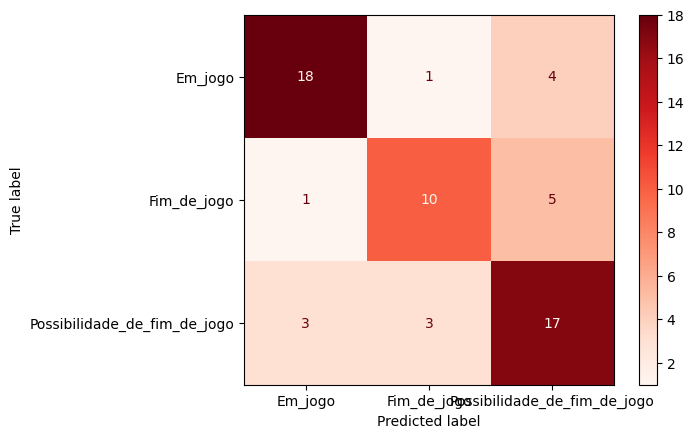

In [11]:
nomes_classes = velha.iloc[:, [9]].values
classes_unicas = np.unique(nomes_classes)
#print(classes_unicas)

cm = confusion_matrix(y_v, y_predicao)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_unicas)
disp.plot(cmap='Reds')

No trecho abaixo, mostramos a forma de cálculo da acurácia. E também executamos o método accuracy_score que igualmente calcula a acurácia. Executando ainda o método classification_report que calcula as métricas conhecidas precision, recall e f-measure.

In [12]:
acerto = 0
for i in range(0, len(y_predicao)):
  if y_predicao[i]==y_v[i]: acerto = acerto + 1

print("Acuracia: ", acerto/len(y_predicao))
print(accuracy_score(y_v, y_predicao))
print(classification_report(y_v, y_predicao))

Acuracia:  0.7258064516129032
0.7258064516129032
                              precision    recall  f1-score   support

                     Em_jogo       0.82      0.78      0.80        23
                 Fim_de_jogo       0.71      0.62      0.67        16
Possibilidade_de_fim_de_jogo       0.65      0.74      0.69        23

                    accuracy                           0.73        62
                   macro avg       0.73      0.72      0.72        62
                weighted avg       0.73      0.73      0.73        62



Abaixo, exibimos as classes e os pesos (modelo) encontrado no treinamento.

In [13]:
print("Classes: ", clf.classes_ )
print("Melhor loss: ", clf.best_loss_)
print(clf.coefs_)
print(clf.intercepts_)
print(clf.get_params)

Classes:  ['Em_jogo' 'Fim_de_jogo' 'Possibilidade_de_fim_de_jogo']
Melhor loss:  0.12600189141188453
[array([[ 0.30777542, -0.09686712, -1.33447477, -1.24086359, -2.01156688,
        -0.42420257,  0.85002312,  0.50831582,  0.11140445, -0.24589675,
        -0.87195271, -1.52247869, -0.9726787 ,  0.10483491,  0.05068692,
        -2.00690011, -1.85747221, -0.09847429, -0.02431042, -1.09694926,
        -0.68459718,  0.05426953,  0.34144099, -1.17654789,  0.93642354,
         0.03730642,  1.14751885, -0.00625474, -1.86936216, -2.25379097,
        -0.28709652, -0.67974478, -1.9206869 , -1.30482639,  1.10299667,
        -0.73543955, -0.78963877, -1.42790618, -1.58501291, -1.79928462],
       [-0.10088529, -0.74074091,  0.47095908, -0.90617963, -0.2229629 ,
         0.95135721, -1.04519012, -0.44155314, -0.40798719, -0.5979016 ,
         0.01011996,  0.00547126,  0.15942615, -0.608546  ,  0.6937744 ,
        -0.43688147,  0.10757023, -0.21172661, -0.02747761, -0.36722022,
         1.18241703, 